<center> <h2> DS 3000 - Fall 2020</h2> </center>
<center> <h3> DS Report </h3> </center>


<center> <h3> Predicting Obesity Prevalence in US Counties </h3> </center>
<center><h4>Haden Pelletier, Joseph Valenti, Ajay Rao</h4></center>



<hr style="height:2px; border:none; color:black; background-color:black;">

#### Executive Summary:

Add your summary here (100-150 words)

Provide a brief summary of your project. After reading this executive summary, your readers should have a rough understanding of what you did in this project. You can think of this summary in terms of the four sections of the report and write 1-2 sentences describing each section.



<hr style="height:2px; border:none; color:black; background-color:black;">

## Outline
1. <a href='#1'>INTRODUCTION</a>
2. <a href='#2'>METHOD</a>
3. <a href='#3'>RESULTS</a>
4. <a href='#4'>DISCUSSION</a>

<a id="1"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 1. INTRODUCTION

In the United States, the increasing prevalence of obesity has become a serious medical concern that plagues millions of Americans. While advances in medicine have developed effective treatments for obesity, the true cure for obesity relies on its prevention. Genetic factors are known to be correlated with obesity in affected individuals, but other external factors may also contribute to disease acquisition/pathology. Using data analysis, external factors linked to obesity can be identified that may be instrumental in preventative medicine for predisposed individuals. Particularly, we are interested in exploring how patient socioeconomic status relates to the prevalence of obesity in the United States. By analyzing obese patient data by U.S counties, we hope to explore any correlations/patterns between obesity, race, education level, insurance status, poverty, food diet, and other variables. This topic is useful to explore because analyzing patient data may lead to the early identification of U.S. areas that are at high risk for obesity which can inform healthcare professionals to target those high-risk areas and help improve resident patient outcomes and even reduce the obesity prevalence in those areas. We are specifically interested in this project because we know close friends and family members who are affected by obesity and we would like to learn more about how and why certain individuals may be more susceptible to the disease than others. 

This problem is important to address because obesity is a preventable disease that causes or contributes to millions of deaths in the United States. Deaths due to obesity or complications from it are very unfortunate, especially since early detection of the disease can drastically reduce patient mortality rate. Examining how patient socioeconomic status correlates with American obesity could lead to insights about how variables such as race and poverty can influence a person’s physical health. Insights from the project could include understanding if socioeconomic status has significant correlations with American obesity. Understanding such a correlation could be influential for public health officials or healthcare professionals in identifying those high-risk patients for early obesity screenings and directly contributing towards obesity prevention.

## HYPOTHESIS AND QUESTIONS

Questions:

* Which feature (socioeconomic factor) has the highest correlation with obesity prevalence? 
* Which feature has the lowest correlation with obesity prevalence?
* Which features affect obesity prevalence the most?
* Is kNN a better (higher performance) machine-learning algorithm for our data than SVM, Decision Tree, or GaussianNB? 

Hypotheses:

1. The top two socioeconomic risk factors with the greatest correlation (predictive ability) with obesity are poverty prevalence and no high school (HS) diploma.

2. The socioeconomic risk factors with the lowest correlation (predictive ability) with obesity are major depression prevalence and population.

3. The K-Nearest-Neighbors (kNN) classification algorithm will yield the best performance compared to Decision Trees or Gaussian Naive Bayes (Gaussian NB). 

<a id="2"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 2. METHOD

### 2.1. Data Acquisition

* Describe where you obtained your data. Provide a link to the original source. 
* If you scraped your data, include your code as a **separate** script file.
* Your data should be stored in an online repository (e.g., GitHub) and your code should retrieve your data from that online resource. You can read csv files from the Web in the same way that you read files from local drive.
* Describe the dataset (i.e., what it is about) and the number of variables/rows included.


In [185]:
import pandas as pd

We pulled our data from 3 separate data sets, all of which came from a zip file on this site:
https://catalog.data.gov/dataset/community-health-status-indicators-chsi-to-combat-obesity-heart-disease-and-cancer

We used 3 files in this zip:
DEMOGRAPHICS.CSV
RISKFACTORSANDACCESSTOCARE.CSV
VULNERABLEPOPSANDENVHEALTH.CSV

In [186]:
#Get data from Github

url_demo = 'https://github.com/hadenpell/ds3000final/blob/master/datasets/DEMOGRAPHICS.csv?raw=true'
url_risk = 'https://github.com/hadenpell/ds3000final/blob/master/datasets/RISKFACTORSANDACCESSTOCARE.csv?raw=true'
url_vul = 'https://github.com/hadenpell/ds3000final/blob/master/datasets/VUNERABLEPOPSANDENVHEALTH.csv?raw=true'

demo_df = pd.read_csv(url_demo)
risk_df = pd.read_csv(url_risk)
vul_df = pd.read_csv(url_vul)

We searched these data sets for the data we wanted.

We wanted to include columns for : County Name, State Name, Population Size, Obesity, No Exercise, Few Fruits / Vegetables, 
Poverty, No HS Diploma, Major Depression, Diabetes, Uninsured, Non-White (Original data set provided all races by percentage. To find the percentage of non white people in the population, we subtracted the percentage of white population from 100.)

We also wished to define everything in terms of prevalence. Some of the data points were in population form (e.g returned the actual count of people who had major depression in county x).

### 2.2. Data Analysis
* For your hypotheses, what are your IVs and DVs?
* Specifically describe your predictive model. What outcome variable are you going to predict from what feature variables? Why do you think those are important predictors?
* Describe why this is a supervised ML problem and identify the sub-category of the learning task (e.g. classification).
* What machine learning algorithms are you going to use? **Why?** You should compare at least three algorithms.

For hypothesis 1, the independent variable (IV) is the socioeconomic risk factor with two levels: prevalence of poverty and the prevalence of no high school (HS) diploma in US counties. The dependent variable (DV) is the IV’s correlation (predictive ability) with obesity prevalence in those US counties. 

For hypothesis 2, the independent variable (IV) is the socioeconomic risk factor with two levels: prevalence of major depression and the population in US counties. The dependent variable (DV) is the IV’s correlation (predictive ability) with obesity prevalence in those US counties.

For hypothesis 3, the independent variable (IV) is the supervised machine learning classification algorithm with 3 levels: kNN, Decision Trees, and GaussianNB. The dependent variable (DV) is the model performance with our dataset.


Synthesizing our various hypotheses, our primary focus is to predict the obesity prevalence in a US county from various socioeconomic feature variables. Socioeconomic factors, such as the prevalence of poverty or high blood pressure, have been widely studied across several disciplines and have been determined to be significant risk factors for obesity in a given population. Poverty in particular is known to be very highly correlated with obesity. As a lack of HS diploma is correlated with poverty, we believe these will be the most important features for our model. Major depression is linked to problems with eating, however there is not very strong evidence that it is linked to overeating in all cases (in many, depression is linked to undereating). It will be interesting to see the relationship between depression and obesity prevalence, however, we do not believe it will be as significant as other factors. Similarly, we believe population size will have little to no effect on obesity prevalence in a county, and because of this we have predicted that depression and population are the least predictive factors. We hope to predict obesity prevalence in a US county by some/all of that county’s socioeconomic factors: no exercise prevalence, few fruits/vegetables consumption prevalence, no high school diploma prevalence, major depression prevalence, diabetes prevalence, non-white racial identity prevalence, uninsured prevalence, and high blood pressure prevalence. 

To better contextualize quantitative obesity prevalence data, obesity prevalence values will be classified into “high”, “moderate” or “low” categories depending on calculated binning criteria. Given that our data contains a labelled target variable, we are using a supervised machine learning model. Since we are looking to predict the category of obesity prevalence from our feature variables, we are specifically focusing on using classification algorithms. By analyzing the prevalence data from our feature variables, we hope to predict a sample county’s obesity prevalence category, which can be assessed as the obesity risk for that population.

We will be testing and evaluating our classification model with 3 classification algorithms: K-Nearest-Neighbors, Decision Trees, and Gaussian Naive Bayes. K-Nearest-Neighbors will be used because it is easy to understand, is easily hyperparameter tunable, and offers strong performance when using datasets with few features (like ours). Decision Trees will be used because the data can be easily visualized and interpreted and feature normalization and scaling are typically not needed. Gaussian Naive Bayes will be used because the model is simple to understand, offers efficient parameter estimation, and offers a good baseline comparison against other classification algorithms.


<a id="3"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 3. RESULTS

### 3.1. Data Wrangling
In this section, you should do the following and explain why you are doing what you are doing. For each, you should include your code in a cell, followed by a sample output. For instance, if you are one-hot encoding one of your variables, you should first describe what it is and why you are doing it. You should then include your code in a cell, and the sample output should be available as well.

* Perform simple data cleaning (delete extra columns, deal with NA values, etc.)
* Perform data wrangling to get your features and target values (e.g., grouping your dataframe by columns, applying functions to format dataframes, etc.)
* Preprocess your variables (e.g., scaling/transforming feature variables to normalize them)
* Perform feature extraction (dummy variables, new features from existing features, etc.)
* Use one feature selection technique to select a subset of your original features


## Data cleaning

We merged the 3 data sets and kept only desired columns.

In [187]:
merged_df = demo_df.merge(vul_df).merge(risk_df)

In [188]:
#Keeping only non zero and positive values for columns with negative values 
#(The data set specified that negative values = missing data) 
merged_df = merged_df[merged_df['Obesity'] > 0]
merged_df = merged_df[merged_df['No_Exercise'] > 0]
merged_df = merged_df[merged_df['Few_Fruit_Veg'] > 0]
merged_df = merged_df[merged_df['High_Blood_Pres'] > 0]
merged_df = merged_df[merged_df['Uninsured'] > 0]

In [189]:
#Create "Non-White column"
merged_df["Non-White"] = 100 - merged_df["White"]

In [190]:
merged_df

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Strata_ID_Number,Strata_Determining_Factors,Number_Counties,Population_Size,Min_Population_Size,...,CI_Min_Diabetes,CI_Max_Diabetes,Uninsured,Elderly_Medicare,Disabled_Medicare,Prim_Care_Phys_Rate,Dentist_Rate,Community_Health_Center_Ind,HPSA_Ind,Non-White
0,1,1,Autauga,Alabama,AL,29,"frontier status, population size, poverty, age",37,48612,28447,...,9.1,19.3,5690,4762,1209,45.3,22.6,1,2,19.3
1,1,3,Baldwin,Alabama,AL,16,"frontier status, population size, poverty, age",27,162586,118395,...,5.2,9.3,19798,22635,3839,67.0,30.8,1,2,11.6
7,1,15,Calhoun,Alabama,AL,6,"frontier status, population size, poverty",53,112141,111380,...,8.4,13.9,16456,16440,5301,75.8,41.9,1,2,21.7
10,1,21,Chilton,Alabama,AL,32,"frontier status, population size, poverty, age",37,41744,29918,...,3.2,8.9,6130,4527,1307,31.1,19.2,1,2,11.7
21,1,43,Cullman,Alabama,AL,21,"frontier status, population size, poverty, age",44,79886,53309,...,6.5,13.5,11912,11129,2400,53.8,22.5,1,2,2.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,56,37,Sweetwater,Wyoming,WY,77,"frontier status, population size",15,37975,26995,...,4.2,6.4,5477,3260,572,50.0,52.7,2,1,4.5
3137,56,39,Teton,Wyoming,WY,78,"frontier status, population size, poverty, age",43,19032,765,...,1.4,3.4,1846,1393,82,147.1,57.8,2,2,2.1
3138,56,41,Uinta,Wyoming,WY,38,"frontier status, population size, poverty, age",35,19939,7467,...,3.4,6.2,3007,1431,357,65.2,40.1,2,1,2.5
3139,56,43,Washakie,Wyoming,WY,82,"frontier status, population size, poverty, age",37,7933,1573,...,6.6,12.1,1178,1338,136,50.4,50.4,1,1,2.8


In [191]:
#filtering out only desired columns
cols = ["CHSI_County_Name", "CHSI_State_Name",
                        "Population_Size","Obesity","No_Exercise",
                        "Few_Fruit_Veg","Poverty","No_HS_Diploma","Major_Depression","Diabetes",
           "Non-White","Uninsured","High_Blood_Pres"]

df_cols = merged_df[cols]
df_cols

,CHSI_County_Name,CHSI_State_Name,Population_Size,Obesity,No_Exercise,Few_Fruit_Veg,Poverty,No_HS_Diploma,Major_Depression,Diabetes,Non-White,Uninsured,High_Blood_Pres
0,Autauga,Alabama,48612,24.5,27.8,78.6,10.4,6690,2680,14.2,19.3,5690,29.1
1,Baldwin,Alabama,162586,23.6,27.2,76.2,10.2,20254,9354,7.2,11.6,19798,30.5
7,Calhoun,Alabama,112141,27.0,29.2,81.9,16.4,19546,6400,11.2,21.7,16456,33.2
10,Chilton,Alabama,41744,31.2,30.3,82.8,14.9,9484,2355,6.0,11.7,6130,26.5
21,Cullman,Alabama,79886,22.2,29.4,76.2,13.3,16275,4572,10.0,2.7,11912,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,Sweetwater,Wyoming,37975,23.6,21.9,80.7,8.6,3081,2649,5.3,4.5,5477,22.7
3137,Teton,Wyoming,19032,9.0,9.6,68.8,5.6,762,1455,2.4,2.1,1846,18.9
3138,Uinta,Wyoming,19939,22.7,23.4,83.1,10.6,1842,1347,4.8,2.5,3007,22.5
3139,Washakie,Wyoming,7933,21.1,23.2,78.1,11.1,780,576,9.4,2.8,1178,27.8


In [192]:
#Now, we converted all the columns that were in terms of population (No_HS_Diploma, Major_Depression, Uninsured) to prevalence
#by dividing their values by the total population of the county.
def make_prev(name):
    for i in range(3141):
        if i in df_cols.index:
            df_cols[name][i]="{:.1f}".format((float(df_cols[name][i]/df_cols["Population_Size"][i]) * 1000)/10)
        else:
            pass

In [193]:
make_prev("No_HS_Diploma")

<ipython-input-192-b8720bbe8528>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cols[name][i]="{:.1f}".format((float(df_cols[name][i]/df_cols["Population_Size"][i]) * 1000)/10)
/Users/hadenpelletier/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/hadenpelletier/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:1024: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [194]:
make_prev("Major_Depression")

<ipython-input-192-b8720bbe8528>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cols[name][i]="{:.1f}".format((float(df_cols[name][i]/df_cols["Population_Size"][i]) * 1000)/10)
<ipython-input-194-8c36fb647948>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  make_prev("Major_Depression")


In [195]:
make_prev("Uninsured")

<ipython-input-192-b8720bbe8528>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cols[name][i]="{:.1f}".format((float(df_cols[name][i]/df_cols["Population_Size"][i]) * 1000)/10)
<ipython-input-195-0d769b3623dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  make_prev("Uninsured")


In [196]:
df_cols

,CHSI_County_Name,CHSI_State_Name,Population_Size,Obesity,No_Exercise,Few_Fruit_Veg,Poverty,No_HS_Diploma,Major_Depression,Diabetes,Non-White,Uninsured,High_Blood_Pres
0,Autauga,Alabama,48612,24.5,27.8,78.6,10.4,13.8,5.5,14.2,19.3,11.7,29.1
1,Baldwin,Alabama,162586,23.6,27.2,76.2,10.2,12.5,5.8,7.2,11.6,12.2,30.5
7,Calhoun,Alabama,112141,27.0,29.2,81.9,16.4,17.4,5.7,11.2,21.7,14.7,33.2
10,Chilton,Alabama,41744,31.2,30.3,82.8,14.9,22.7,5.6,6.0,11.7,14.7,26.5
21,Cullman,Alabama,79886,22.2,29.4,76.2,13.3,20.4,5.7,10.0,2.7,14.9,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,Sweetwater,Wyoming,37975,23.6,21.9,80.7,8.6,8.1,7.0,5.3,4.5,14.4,22.7
3137,Teton,Wyoming,19032,9.0,9.6,68.8,5.6,4.0,7.6,2.4,2.1,9.7,18.9
3138,Uinta,Wyoming,19939,22.7,23.4,83.1,10.6,9.2,6.8,4.8,2.5,15.1,22.5
3139,Washakie,Wyoming,7933,21.1,23.2,78.1,11.1,9.8,7.3,9.4,2.8,14.8,27.8


In [197]:
#Save cleaned data set to csv
df_cols.to_csv("CleanData_Obesity.csv")

## Scaling features

In [198]:
from sklearn.preprocessing import StandardScaler

to_scale = df_cols[["Population_Size", "No_Exercise", "Few_Fruit_Veg", "Poverty", "No_HS_Diploma", 
      "Major_Depression", "Diabetes", "Non-White", "Uninsured", "High_Blood_Pres", "Obesity"]]

s = StandardScaler()
s.fit(to_scale)
scaled = s.transform(to_scale)

obesity_scaled = pd.DataFrame(scaled)

obesity_scaled = obesity_scaled.rename(columns={0:"Population_Size", 1:"No_Exercise", 2:"Few_Fruit_Veg",
                              3:"Poverty", 4:"No_HS_Diploma",5:"Major_Depression",6:"Diabetes",
                              7:"Non-White",8:"Uninsured",9:"High_Blood_Pres",10:"Obesity"})

We then feature engineered our obesity prevalence rate data to create 3 bins
for our model to make predictions on: Low, Moderate, and High

In [199]:
from sklearn.preprocessing import KBinsDiscretizer

In [200]:
discretizer = KBinsDiscretizer(n_bins=3, encode = "onehot-dense", strategy="quantile")

ob_discretized = discretizer.fit_transform(obesity_scaled["Obesity"].values.reshape(-1,1))

In [201]:
#Get the edges of the bins to determine categories
edges = discretizer.bin_edges_[0]
edges

array([-3.49456144, -0.41691755,  0.38694466,  3.39568607])

Categories determined using bin edges of scaled data.

Low: -3.5 to -0.42

Moderate: -0.42 to 0.39

High: 0.39 to 3.4

In [202]:
#Add an extra column, "Obesity_Class", which maps the function below onto a new column
#using obesity prevalence rates from "Obesity" column

def classify_prev(data):
    if(data < edges[1]):
        return "Low"
    elif(data > edges[2]):
        return "High"
    else:
        return "Moderate"
    
obesity_scaled["Obesity_Class"] = obesity_scaled["Obesity"].map(classify_prev)

In [203]:
#Drop obesity column for training/testing
obesity_scaled.drop("Obesity",axis=1,inplace=True)

## Split data into features and target

In [204]:
features = obesity_scaled.drop("Obesity_Class", axis=1)
target = obesity_scaled["Obesity_Class"]

## Train test split

In [205]:
from sklearn.model_selection import train_test_split

In [206]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=3000)

## Feature selection

In [207]:
from sklearn.feature_selection import SelectKBest

In [208]:
select = SelectKBest(k=5)
select.fit(X_train, y_train)

X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)

In [209]:
select.get_support()

array([False,  True, False, False,  True, False,  True, False, False,
        True])

In [210]:
print(features.columns)

Index(['Population_Size', 'No_Exercise', 'Few_Fruit_Veg', 'Poverty',
       'No_HS_Diploma', 'Major_Depression', 'Diabetes', 'Non-White',
       'Uninsured', 'High_Blood_Pres'],
      dtype='object')


From this we can determine that the 5 best features to select for model performance are:
* No exercise
* Poverty
* No HS Diploma
* Diabetes
* High blood pressure

### 3.2. Data Exploration
* Generate appropriate data visualizations for your key variables identified in the previous section
* You should have at least three visualizations (and at least two different visualization types)
* For each visualization provide an explanation regarding the variables involved and an interpretation of the graph.
* If you are using Plotly, insert your visualizations as images as well (upload the graph images to an online source, e.g. github, and embed those into the cells in Jupyter Notebook). This is a requirement.


1. SCATTER MATRIX
Plotting top 5 features against each other

In [247]:
import plotly.express as px

In [248]:
px.scatter_matrix(to_scale, dimensions = ["Diabetes","High_Blood_Pres","Poverty","No_Exercise","No_HS_Diploma"], color = "Obesity")

2. SCATTERPLOT


In [249]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

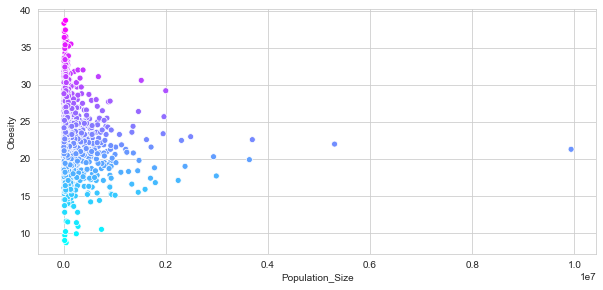

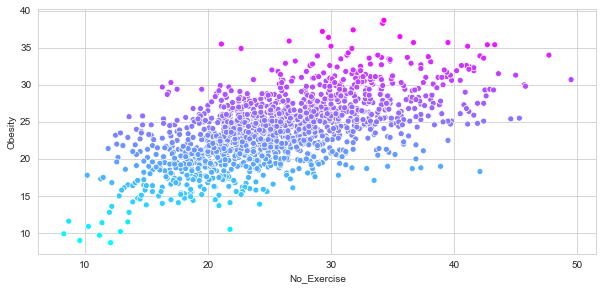

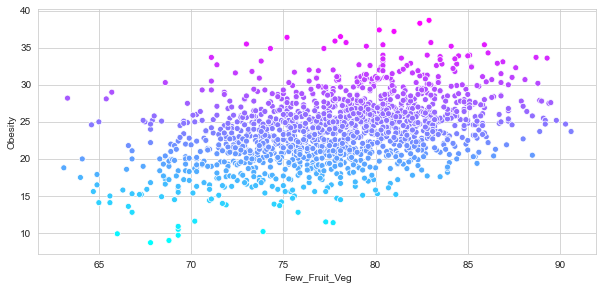

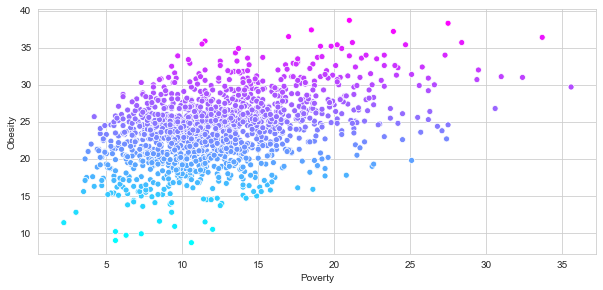

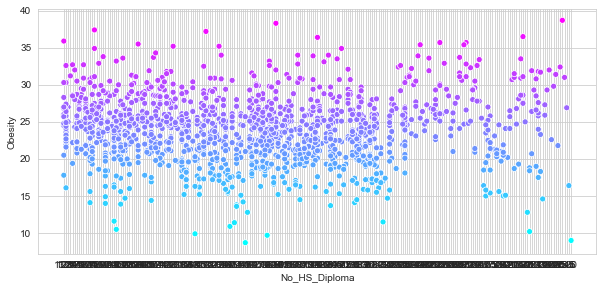

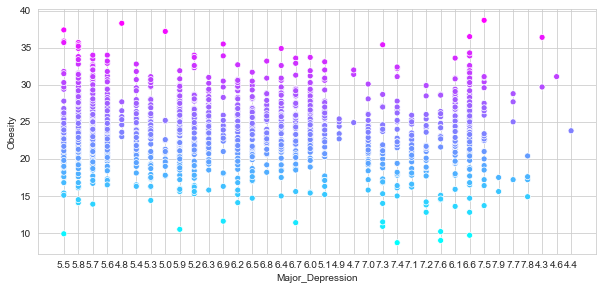

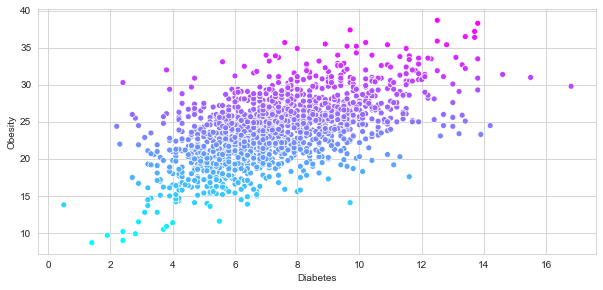

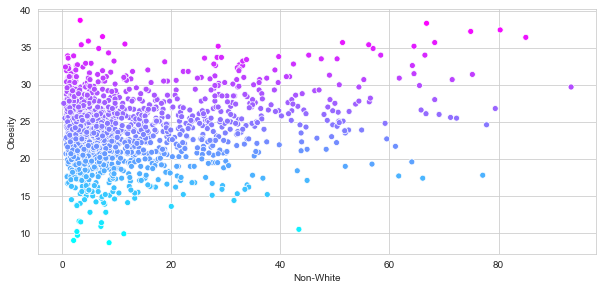

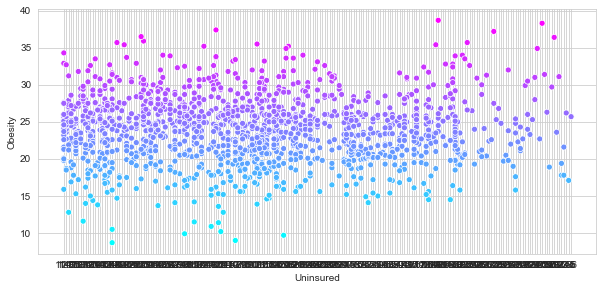

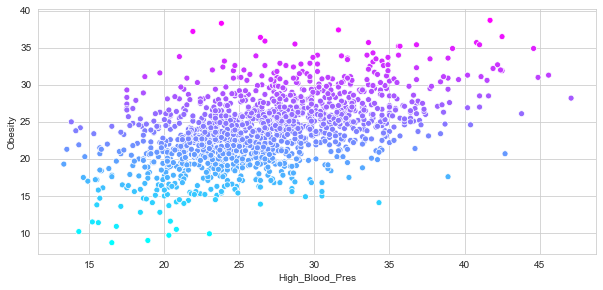

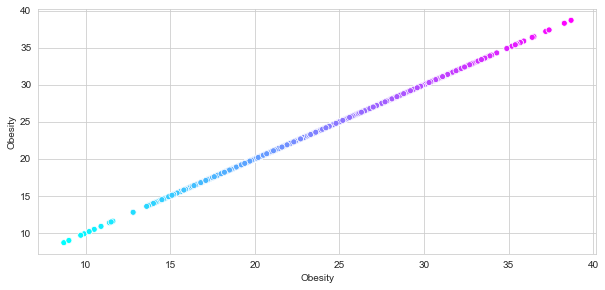

In [243]:
for feature in to_scale:
    plt.figure(figsize=(10, 4.5))
    sns.scatterplot(data=to_scale, x=feature, y='Obesity', hue='Obesity', palette='cool', legend=False)

3. HEAT MAP

When visualizing the features' relevance towards obesity rates in certain community,
it became apparent that this would be tricky as these statistics have larger ranges of variability
in their values, some average percentages of the population were close to 100 percent and some percentages
averaged below 10 percent. To visualize this in a heat map, it was important to try and visualize this in a 
way that showed how divergent a value was from the norm with respect to its obesity rate. It was decided that
the best way to do this was to create two heatmaps that represented counties with the highest obesity rates
and lowest obesity rates, that showed the prevelences of the features that were selected for our model.
To try and standardized this so that the data focused more on divergences and less on the numbers themselves,
the values wewre translated into Z scores, which would show how far something above the mean was for our given 
model.  That way, a proportional large increase was favored in the data over a larger numerical increase with
less significance.  For our figures, a value above the mean is shown with red tinted values that increase in 
brightness as divergence increased, where as values below the mean were blue tinted that increase in brightness 
as they diverged from the mean.  These values on the graph were centered at 0 (the mean), and were capped at 3
in both positive and negative direction in order to show a better color reflection, as higher standards above 
the mean lowered the diversity of color while not providing additional information.  The results of these were 
interesting as the results were pretty diverse, but they were still successful as the higher obesity class
had values more typically above the mean, meaning more red values, and the lower obesity class had values 
below the mean more frequently, resulting in more blue.  The variance in the colors speaks to the complexity
of the issue.  One additional thing to note was there seemed to be a trend in counties that had data not fitting
in the trend, meaning that if a county had a low z score in one feature, many other features also reflected this.  

This could speak to how obesity looks different in different locations.


In [ ]:
import plotly


### 3.3. Model Construction
* Conduct your hypothesis test(s) here.
* For your machine learning question(s), use the Training, Validation, and Testing approach through GridSearch
* Apply machine learning algorithms (apply at least three different algorithms)
* Train your algorithms

The only columns we need to build our model are: 
* "Population_Size"
* "No_Exercise" 
* "Few_Fruit_Veg"
* "Poverty" 
* "No_HS_Diploma"
* "Major_Depression"
* "Diabetes"
* "Non-White"
* "Uninsured"
* "High_Blood_Pres"
* "Obesity_Class"

For this reason we will use the obesity_class data frame for model training and testing.

In [211]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np

Cross validation: testing all 3 algorithms with KFold split

In [212]:
estimators = {
    'k-Nearest Neighbor': KNeighborsClassifier(), 
    'Gaussian Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier()}

In [213]:
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=9, random_state=3000, shuffle=True)
    
    scores = cross_val_score(estimator=estimator_object, X=features, y=target, cv=kfold)
    
    print(estimator_name + ": \n\t" + f'mean accuracy={scores.mean():.2%}, ' + f'standard deviation={scores.std():.2%}' +"\n")

k-Nearest Neighbor: 
	mean accuracy=54.11%, standard deviation=2.75%

Gaussian Naive Bayes: 
	mean accuracy=57.31%, standard deviation=4.17%

Decision Tree: 
	mean accuracy=49.79%, standard deviation=4.08%



Algorithm 1: KNeighborsClassifier()

In [214]:
knn = KNeighborsClassifier()
knn.fit(X=X_train_selected, y=y_train)

KNeighborsClassifier()

Algorithm 2: GaussianNB()

In [215]:
gaussian = GaussianNB()
gaussian.fit(X=X_train_selected, y=y_train)

GaussianNB()

Algorithm 3: DecisionTreeClassifier()

In [216]:
tree = DecisionTreeClassifier()
tree.fit(X=X_train_selected, y=y_train)

DecisionTreeClassifier()

### 3.4. Model Evaluation
* Evaluate the performance of your algorithms on appropriate evaluation metrics, using your **validation set**
    * Use at least two different metrics 
* Evaluate your results from multiple ML models and hypothesis tests
    * What was the performance of each algorithm in plain English? Is there any indication of overfitting/underfitting?
    * Was there a significant difference? Use the template from lecture slides when reporting the results of your hypothesis testing.

MODEL SCORE

In [217]:
print("KNN\n")
print("\tPrediction accuracy on the training data:", format(knn.score(X_train_selected, y_train)*100, ".2f"))
print("\tPrediction accuracy on the test data:", format(knn.score(X_test_selected, y_test)*100, ".2f"))

print("\nGaussian NB\n")
print("\tPrediction accuracy on the training data:", format(gaussian.score(X_train_selected, y_train)*100, ".2f"))
print("\tPrediction accuracy on the test data:", format(gaussian.score(X_test_selected, y_test)*100, ".2f"))

print("\nDecision Tree\n")
print("\tPrediction accuracy on the training data:", format(tree.score(X_train_selected, y_train)*100, ".2f"))
print("\tPrediction accuracy on the test data:", format(tree.score(X_test_selected, y_test)*100, ".2f"))

KNN

	Prediction accuracy on the training data: 66.20
	Prediction accuracy on the test data: 53.76

Gaussian NB

	Prediction accuracy on the training data: 58.77
	Prediction accuracy on the test data: 54.32

Decision Tree

	Prediction accuracy on the training data: 100.00
	Prediction accuracy on the test data: 42.34


MODEL CLASSIFICATION REPORT

In [218]:
from sklearn.metrics import classification_report

In [219]:
knn_predicted = knn.predict(X=X_test_selected)
gauss_predicted = gaussian.predict(X=X_test_selected)
tree_predicted = tree.predict(X=X_test_selected)

expected = y_test

In [220]:
knn_report = classification_report(y_true=expected, y_pred=knn_predicted)

print("KNN class report:\n",knn_report)

KNN class report:
               precision    recall  f1-score   support

        High       0.52      0.66      0.58       117
         Low       0.56      0.61      0.58       111
    Moderate       0.53      0.37      0.43       131

    accuracy                           0.54       359
   macro avg       0.54      0.55      0.53       359
weighted avg       0.54      0.54      0.53       359



In [221]:
gauss_report = classification_report(y_true=expected, y_pred=gauss_predicted)

print("Gaussian NB report:\n",gauss_report)

Gaussian NB report:
               precision    recall  f1-score   support

        High       0.63      0.55      0.58       117
         Low       0.53      0.67      0.59       111
    Moderate       0.48      0.44      0.46       131

    accuracy                           0.54       359
   macro avg       0.55      0.55      0.54       359
weighted avg       0.55      0.54      0.54       359



In [222]:
tree_report = classification_report(y_true=expected, y_pred=tree_predicted)

print("Decision Tree:\n",gauss_report)

Decision Tree:
               precision    recall  f1-score   support

        High       0.63      0.55      0.58       117
         Low       0.53      0.67      0.59       111
    Moderate       0.48      0.44      0.46       131

    accuracy                           0.54       359
   macro avg       0.55      0.55      0.54       359
weighted avg       0.55      0.54      0.54       359



### 3.5. Model Optimization
* Tune your models using appropriate hyperparameters
* Explain why you are doing this (e.g., to avoid overfitting, etc.)

KNN optimization: Finding the best n_neighbors and metric

In [223]:
knn_params = [{"n_neighbors": np.arange(1,30), "metric":["euclidean","manhattan","minkowski"]}]

In [224]:
from sklearn.model_selection import GridSearchCV
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
knn_grid_search.fit(X=X_train_selected,y=y_train)

print("Best parameters: ", knn_grid_search.best_params_)

Best parameters:  {'metric': 'euclidean', 'n_neighbors': 27}


In [225]:
knn_tuned = KNeighborsClassifier(n_neighbors=13)
knn_tuned.fit(X=X_train_selected, y=y_train)

KNeighborsClassifier(n_neighbors=13)

Gaussian tuning
We did not explicitly cover Gaussian tuning in class, however, using get_params
we were able to see that GaussianNB had a var_smoothing param which had a default value of 1e-9.

In [226]:
gauss_params = [{"var_smoothing":np.arange(0.000000001, 10)}]

In [227]:
gauss_grid_search = GridSearchCV(GaussianNB(), gauss_params, cv=5)
gauss_grid_search.fit(X=X_train_selected,y=y_train)

print("Best parameters: ", gauss_grid_search.best_params_)
print("Test set score: ", gauss_grid_search.score(X_test_selected, y_test))

Best parameters:  {'var_smoothing': 1e-09}
Test set score:  0.5431754874651811


Decision tree tuning

In [228]:
tree_params = [{'max_depth':np.arange(1,10), 'min_samples_split':[2,10,100]}]

In [229]:
tree_grid_search = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=5)
tree_grid_search.fit(X=X_train_selected,y=y_train)

print("Best parameters: ", tree_grid_search.best_params_)

Best parameters:  {'max_depth': 4, 'min_samples_split': 2}


### 3.6. Model Testing
* Test your tuned algorithms using your **testing set**

With tuned parameters:

In [230]:
print("KNN tuned test set score: ", knn_grid_search.score(X_test_selected, y_test))
print("GaussianNB tuned test set score: ", gauss_grid_search.score(X_test_selected, y_test))
print("Decision tree tuned test set score: ", tree_grid_search.score(X_test_selected, y_test))

KNN tuned test set score:  0.5236768802228412
GaussianNB tuned test set score:  0.5431754874651811
Decision tree tuned test set score:  0.532033426183844


<a id="4"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 4. DISCUSSION
* Interpret your findings from 3.4., 3.5, and 3.6
    * Which algorithms did you compare?
    * Which algorithm(s) revealed best performance?
    * Which algorithm(s) should be used for your predictive model?
    * Based on your findings, can we use the features in your dataset to predict the outcome variable you identified using the algorithms you've applied? (It is okay if the answer is no. We're interested in the process, not the performance of the model.)
* For your hypotheses, interpret the results. What does it mean to have significant/non-significant differences with regards to your data?


* End this section with a conclusion paragraph containing some pointers for future work
    * (e.g., get more data/features, perform another analysis, etc.)

<a id="5"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

### CONTRIBUTIONS
* Describe each team member's contributions to the report (who did what in each section)
* Remember this is a team effort!
* Each member of your team will provide peer evaluation of other team members. Your final grade on the project will be based on those peer evaluations. A survey will be shared after the deadline for this deliverable.

Haden: 

Joseph:

Ajay: